<a href="https://colab.research.google.com/github/SUNIL-S2004/machine-learning/blob/main/LstmFl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
history = 12 #last values used by model
future = 6 #predict future values

df = pd.read_csv('nflda.csv')

def Tranform_dataset(input_length, output_length, data):
    df = data.copy()
    #x columns
    i = 0
    while i < input_length:
        df[f'x_{i}'] = df['flood'].shift(-i)
        i = i + 1

    #y columns
    j = 0
    while j < output_length:
        df[f'y_{j}'] = df['flood'].shift(-output_length-j)
        j = j + 1

    #drop last columns which might have NAN
    df = df.dropna(axis=0)
    return df

full_data = Tranform_dataset(history, future, df)
full_data.head(3)

,year,flood,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,y_0,y_1,y_2,y_3,y_4,y_5
0,1901,3248.6,3248.6,3326.6,3271.2,3129.7,2741.6,2708.0,3671.1,2648.3,3050.2,2848.6,2726.7,3451.3,3671.1,2648.3,3050.2,2848.6,2726.7,3451.3
1,1902,3326.6,3326.6,3271.2,3129.7,2741.6,2708.0,3671.1,2648.3,3050.2,2848.6,2726.7,3451.3,2610.8,2648.3,3050.2,2848.6,2726.7,3451.3,2610.8
2,1903,3271.2,3271.2,3129.7,2741.6,2708.0,3671.1,2648.3,3050.2,2848.6,2726.7,3451.3,2610.8,2899.1,3050.2,2848.6,2726.7,3451.3,2610.8,2899.1


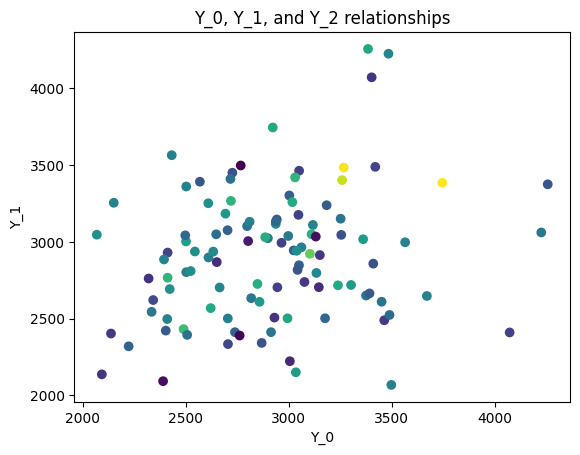

In [ ]:
# @title Y_0, Y_1, and Y_2 relationships

import matplotlib.pyplot as plt
plt.scatter(full_data['y_0'], full_data['y_1'], c=full_data['y_2'])
plt.xlabel('Y_0')
plt.ylabel('Y_1')
_ = plt.title('Y_0, Y_1, and Y_2 relationships')

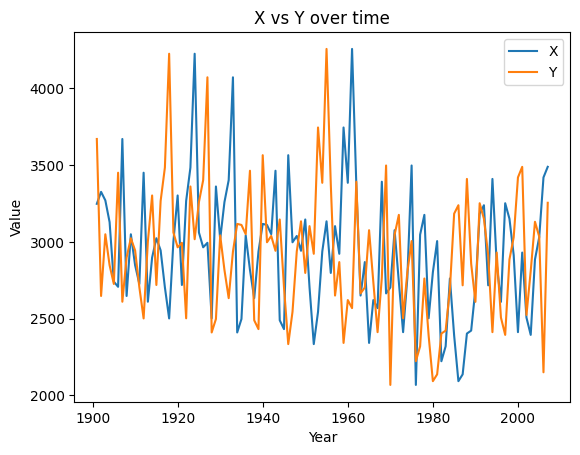

In [ ]:
# @title Line chart of X vs Y over time

import matplotlib.pyplot as plt
plt.plot(full_data['year'], full_data['x_0'], label='X')
plt.plot(full_data['year'], full_data['y_0'], label='Y')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('X vs Y over time')
_ = plt.legend()

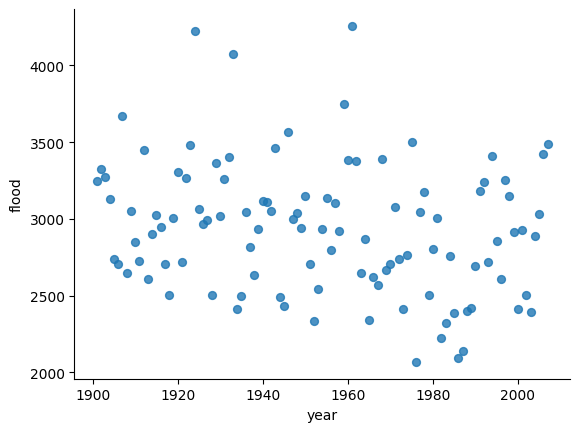

In [ ]:
# @title year vs flood

from matplotlib import pyplot as plt
full_data.plot(kind='scatter', x='year', y='flood', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

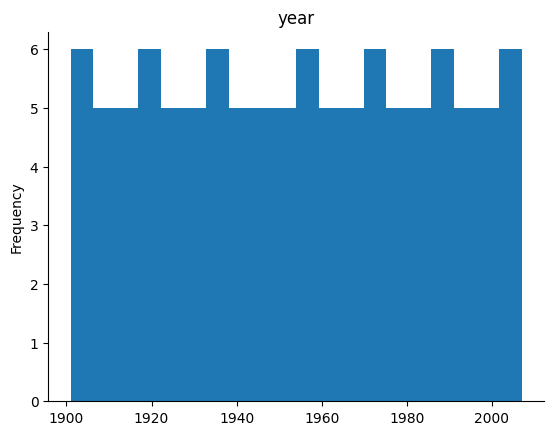

In [ ]:
# @title year

from matplotlib import pyplot as plt
full_data['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Conv1D
tf.random.set_seed(0)

In [ ]:
def get_model_cnn_lstm(history, future):
    model = Sequential()
    model.add(tf.keras.Input(shape=(history, 1)))  # Assuming the input shape is (history, 1)
    model.add(Conv1D(filters=6, kernel_size=5, activation='relu'))
    model.add(LSTM(6, return_sequences=True, activation='relu'))
    model.add(LSTM(6, return_sequences=False, activation='relu'))
    model.add(Dense(future))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model_cnnlstm = get_model_cnn_lstm(history, future)
model_cnnlstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 6)              36        
                                                                 
 lstm (LSTM)                 (None, 8, 6)              312       
                                                                 
 lstm_1 (LSTM)               (None, 6)                 312       
                                                                 
 dense (Dense)               (None, 6)                 42        
                                                                 
Total params: 702 (2.74 KB)
Trainable params: 702 (2.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have defined the functions and loaded the dataset as you did in the previous code snippet

# Splitting the data into features and labels
X = full_data[['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11']].values
y = full_data[['y_0', 'y_1', 'y_2', 'y_3', 'y_4', 'y_5']].values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
hist_cnn_lstm = model_cnnlstm.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0, validation_data=(X_test, y_test),
                 shuffle=True, callbacks=callbacks_cnn_lstm)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Saving the model using the native Keras format
model_cnnlstm.save('my_model.keras')


In [ ]:
# Assuming you have a trained model named `model_cnnlstm`

# Prepare input data for prediction
# Example: Use the last 12 values from your dataset as input
input_data = full_data[['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11']].tail(1).values

# Make predictions
predicted_values = model_cnnlstm.predict(input_data)

# Print or view the predicted values
print("Predicted values:", predicted_values)


1/1 [==============================] - 0s 419ms/step
Predicted values: [[2683.0693 2775.5908 2838.346  2727.2778 2723.5098 2744.5742]]
